In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

aer_sim = AerSimulator()

service = QiskitRuntimeService()
backend = service.get_backend("ibm_kyiv")

In [2]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

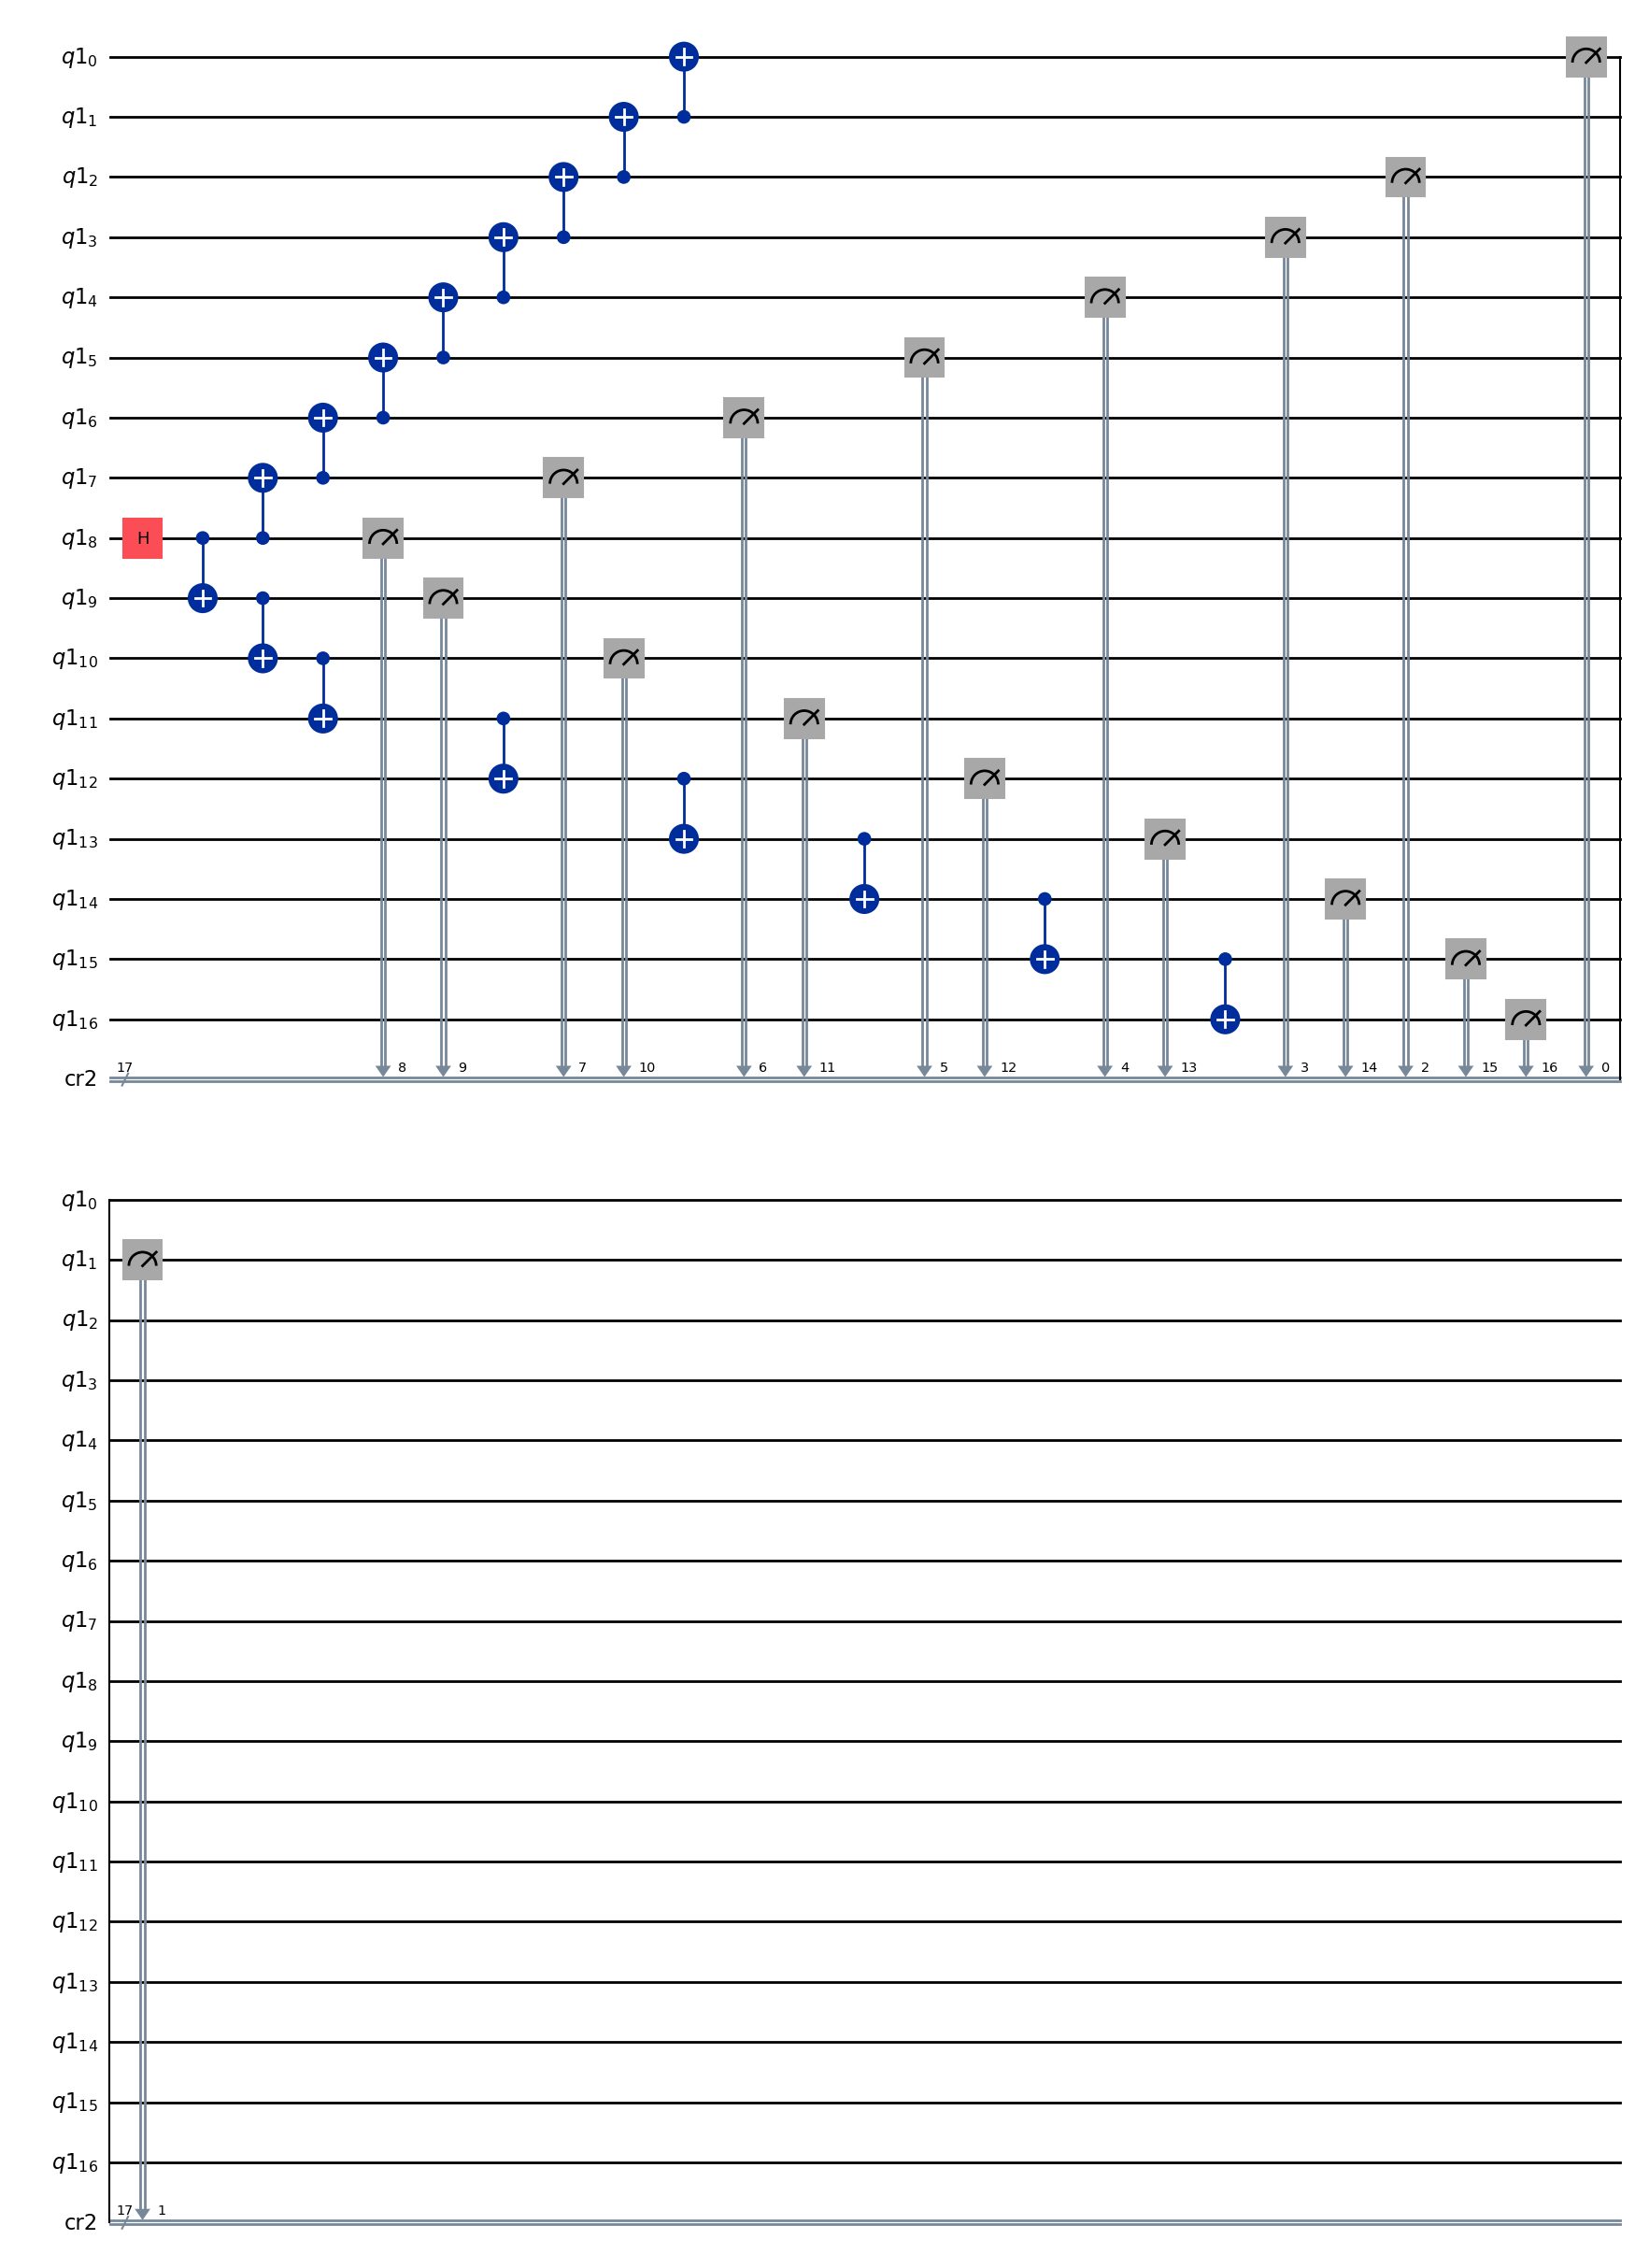

In [3]:
qc = get_ghz_circ_static(num_qubit=17)
qc.draw('mpl')

In [4]:
# real trnaspilation and ideal transpilation
pm_r = generate_preset_pass_manager(backend=backend, optimization_level=3)
pm_1_r = generate_preset_pass_manager(backend=backend, optimization_level=3, init_method="qubit_reuse_1")
pm_2_r = generate_preset_pass_manager(backend=backend, optimization_level=3, init_method="qubit_reuse_2")
pm_3_r = generate_preset_pass_manager(backend=backend, optimization_level=3, init_method="qubit_reuse_3")
pm_4_r = generate_preset_pass_manager(backend=backend, optimization_level=3, init_method="qubit_reuse_4")
pm_no_threshold_r = generate_preset_pass_manager(backend=backend, optimization_level=3, init_method="qubit_reuse")

pm_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
pm_1_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_1")
pm_2_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_2")
pm_3_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_3")
pm_4_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse_4")
pm_no_threshold_i = generate_preset_pass_manager(backend=aer_sim, optimization_level=3, init_method="qubit_reuse")

qc_transpiled_list_real=[]                  # for 16 qubit variants
qc_transpiled_list_ideal=[]
copies=4

for i in range(copies):
    qc_no_reuse= pm_r.run(qc)
    qc_1=pm_1_r.run(qc)
    qc_2=pm_2_r.run(qc)
    qc_3=pm_3_r.run(qc)
    qc_4=pm_4_r.run(qc)
    qc_no_threshold=pm_no_threshold_r.run(qc)
    
    qc_transpiled_list_real.append(qc_no_reuse)
    qc_transpiled_list_real.append(qc_1)
    qc_transpiled_list_real.append(qc_2)
    qc_transpiled_list_real.append(qc_3)
    qc_transpiled_list_real.append(qc_4)
    qc_transpiled_list_real.append(qc_no_threshold)

    qc_no_reuse_i= pm_i.run(qc)
    qc_1_i=pm_1_i.run(qc)
    qc_2_i=pm_2_i.run(qc)
    qc_3_i=pm_3_i.run(qc)
    qc_4_i=pm_4_i.run(qc)
    qc_no_threshold_i=pm_no_threshold_i.run(qc)

    qc_transpiled_list_ideal.append(qc_no_reuse_i)
    qc_transpiled_list_ideal.append(qc_1_i)
    qc_transpiled_list_ideal.append(qc_2_i)
    qc_transpiled_list_ideal.append(qc_3_i)
    qc_transpiled_list_ideal.append(qc_4_i)
    qc_transpiled_list_ideal.append(qc_no_threshold_i)

threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in plugin is 1
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold received in Greedy is 1
classical registers are [ClassicalRegister(17, 'cr2')]
threshold receiv

In [5]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [6]:
print(result_ideal)
len(result_ideal)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>))), PubResult(data=DataBin(cr

24

In [7]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
k=1
i=0          # I don't need range of qubits, experiment is for only a certain number of qubit e.g. 16 qubit ghz circuit
for j in range(copies):
    data_static = result_ideal[(6*i*copies)+(6*j)].data                 # no qubit reuse
    data_dynamic_1 = result_ideal[(6*i*copies)+((6*j)+1)].data           # qubit reuse with threshold 1
    data_dynamic_2 = result_ideal[(6*i*copies)+((6*j)+2)].data           # qubit reuse with threshold 2
    data_dynamic_3 = result_ideal[(6*i*copies)+((6*j)+3)].data            # qubit reuse with threshold 3
    data_dynamic_4 = result_ideal[(6*i*copies)+((6*j)+4)].data           # qubit reuse with threshold 4
    data_dynamic_5 = result_ideal[(6*i*copies)+((6*j)+5)].data           # qubit reuse without modification
    
    print(data_dynamic_5)
    
    counts_static=data_static.cr2.get_counts()             # normal reuse
    counts_dynamic_1=data_dynamic_1.cr2.get_counts()      # modified reuse 1
    counts_dynamic_2=data_dynamic_2.cr2.get_counts()      # modified reuse 2
    counts_dynamic_3=data_dynamic_3.cr2.get_counts()      # modified reuse 3
    counts_dynamic_4=data_dynamic_4.cr2.get_counts()      # modified reuse 4
    
    # Replacing 'cr2' with the appropriate attribute if needed           # reuse without modification
    dynamic_5_attr_name = f'c{4*k-2}'
    if hasattr(data_dynamic_5, dynamic_5_attr_name):
        counts_dynamic_5 = getattr(data_dynamic_5, dynamic_5_attr_name).get_counts()
    else:
        raise AttributeError(f"{dynamic_5_attr_name} not found in data_dynamic_5")
    
    counts_list_ideal.append(counts_static)             # no reuse
    counts_list_ideal.append(counts_dynamic_1)          # modified reuse 1
    counts_list_ideal.append(counts_dynamic_2)         # modified reuse 2
    counts_list_ideal.append(counts_dynamic_3)         # modified reuse 3
    counts_list_ideal.append(counts_dynamic_4)         # modified reuse 4
    counts_list_ideal.append(counts_dynamic_5)          # reuse without modification
    k=k+1

DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=17>))


In [9]:
# Real hardware simulation on ibm_kyiv
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import Options

sampler = Sampler(backend=backend)
 
# Estimator and Sampler now have different options
options = sampler.options
 
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'   #dynamical_decoupling={'enable':True, 'sequence_type':'XpXm'}
job = sampler.run(qc_transpiled_list_real,shots=1024)
print(job.job_id())

cvs9he5q4ae0008z25g0


In [8]:
#Post-processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'cvs9he5q4ae0008z25g0' #kyiv

service = QiskitRuntimeService()
job = service.job(job_id)
result_real = job.result()

In [9]:
print(result_real)
len(result_real)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=17>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, n

24

In [10]:
#Finding the metrics of the job
result_metric_real=job.metrics()
print(result_metric_real)

{'bss': {'seconds': 130}, 'usage': {'quantum_seconds': 130, 'seconds': 130}, 'timestamps': {'created': '2024-09-24T10:47:21.117Z', 'finished': '2024-09-25T00:27:49.565Z', 'running': '2024-09-25T00:24:05.646Z'}, 'executions': 24576, 'num_circuits': 24, 'num_qubits': [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], 'circuit_depths': [75, 260, 270, 312, 297, 339, 75, 246, 301, 312, 297, 339, 75, 239, 284, 311, 297, 339, 75, 257, 284, 291, 297, 339], 'qiskit_version': 'qiskit_ibm_runtime-0.23.0,qiskit-1.1.0*,qiskit_aer-0.13.3*,qiskit_experiments-0.7.0', 'estimated_start_time': '2024-09-25T00:23:30.213Z', 'estimated_completion_time': '2024-09-25T00:25:40.213Z', 'position_in_queue': None, 'position_in_provider': None}


In [11]:
# For getting list of real counts of IBM kyiv (argument required for Fidelity)
counts_list_real=[]
k=1
i=0
for j in range(copies):
    data_static = result_real[(6*i*copies)+(6*j)].data    
    data_dynamic_1 = result_real[(6*i*copies)+((6*j)+1)].data 
    data_dynamic_2 = result_real[(6*i*copies)+((6*j)+2)].data
    data_dynamic_3 = result_real[(6*i*copies)+((6*j)+3)].data
    data_dynamic_4 = result_real[(6*i*copies)+((6*j)+4)].data
    data_dynamic_5 = result_real[(6*i*copies)+((6*j)+5)].data

    print(data_dynamic_5)
  
    counts_static=data_static.cr2.get_counts()            # no qubit reuse
    counts_dynamic_1=data_dynamic_1.cr2.get_counts()     # modified reuse1
    counts_dynamic_2=data_dynamic_2.cr2.get_counts()      # modified reuse2
    counts_dynamic_3=data_dynamic_3.cr2.get_counts()      # modified reuse3
    counts_dynamic_4=data_dynamic_4.cr2.get_counts()      # modified reuse4
    
    # Replacing 'cr2' with the appropriate attribute if needed      #  qubit reuse no modification
    dynamic_5_attr_name = f'c{4*k-4}'
    if hasattr(data_dynamic_5, dynamic_5_attr_name):
        counts_dynamic_5 = getattr(data_dynamic_5, dynamic_5_attr_name).get_counts()
    else:
        raise AttributeError(f"{dynamic_5_attr_name} not found in data_dynamic_5")
    
    counts_list_real.append(counts_static)
    counts_list_real.append(counts_dynamic_1)
    counts_list_real.append(counts_dynamic_2)
    counts_list_real.append(counts_dynamic_3)
    counts_list_real.append(counts_dynamic_4)
    counts_list_real.append(counts_dynamic_5)
    k=k+1

DataBin(c0=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=17>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=17>))


In [12]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_kyiv
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_kyiv=[]
Fidelity_mean_dynamic_1_kyiv=[]
Fidelity_mean_dynamic_2_kyiv=[]
Fidelity_mean_dynamic_3_kyiv=[]
Fidelity_mean_dynamic_4_kyiv=[]
Fidelity_mean_dynamic_5_kyiv=[]

Fidelity_std_static_kyiv=[]
Fidelity_std_dynamic_1_kyiv=[]
Fidelity_std_dynamic_2_kyiv=[]
Fidelity_std_dynamic_3_kyiv=[]
Fidelity_std_dynamic_4_kyiv=[]
Fidelity_std_dynamic_5_kyiv=[]

Fidelity_copies_static_kyiv=[]
Fidelity_copies_dynamic_1_kyiv=[]
Fidelity_copies_dynamic_2_kyiv=[]
Fidelity_copies_dynamic_3_kyiv=[]
Fidelity_copies_dynamic_4_kyiv=[]
Fidelity_copies_dynamic_5_kyiv=[]

i=0    
for j in range(copies):
    
    Fidelity_static= hellinger_fidelity(counts_list_ideal[(6*i*copies)+(6*j)], counts_list_real[(6*i*copies)+(6*j)])
    Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(6*i*copies)+((6*j)+1)], counts_list_real[(6*i*copies)+((6*j)+1)])
    Fidelity_dynamic_2=hellinger_fidelity(counts_list_ideal[(6*i*copies)+((6*j)+2)], counts_list_real[(6*i*copies)+((6*j)+2)])
    Fidelity_dynamic_3=hellinger_fidelity(counts_list_ideal[(6*i*copies)+((6*j)+3)], counts_list_real[(6*i*copies)+((6*j)+3)])
    Fidelity_dynamic_4=hellinger_fidelity(counts_list_ideal[(6*i*copies)+((6*j)+4)], counts_list_real[(6*i*copies)+((6*j)+4)])
    Fidelity_dynamic_5=hellinger_fidelity(counts_list_ideal[(6*i*copies)+((6*j)+5)], counts_list_real[(6*i*copies)+((6*j)+5)])
    
    Fidelity_copies_static_kyiv.append(Fidelity_static)
    Fidelity_copies_dynamic_1_kyiv.append(Fidelity_dynamic_1)
    Fidelity_copies_dynamic_2_kyiv.append(Fidelity_dynamic_2)
    Fidelity_copies_dynamic_3_kyiv.append(Fidelity_dynamic_3)
    Fidelity_copies_dynamic_4_kyiv.append(Fidelity_dynamic_4)
    Fidelity_copies_dynamic_5_kyiv.append(Fidelity_dynamic_5)


Fidelity_mean_static_kyiv.append(statistics.mean(Fidelity_copies_static_kyiv))
Fidelity_mean_dynamic_1_kyiv.append(statistics.mean(Fidelity_copies_dynamic_1_kyiv))
Fidelity_mean_dynamic_2_kyiv.append(statistics.mean(Fidelity_copies_dynamic_2_kyiv))
Fidelity_mean_dynamic_3_kyiv.append(statistics.mean(Fidelity_copies_dynamic_3_kyiv))
Fidelity_mean_dynamic_4_kyiv.append(statistics.mean(Fidelity_copies_dynamic_4_kyiv))
Fidelity_mean_dynamic_5_kyiv.append(statistics.mean(Fidelity_copies_dynamic_5_kyiv))

Fidelity_std_static_kyiv.append(statistics.stdev(Fidelity_copies_static_kyiv))
Fidelity_std_dynamic_1_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_1_kyiv))
Fidelity_std_dynamic_2_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_2_kyiv))
Fidelity_std_dynamic_3_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_3_kyiv))
Fidelity_std_dynamic_4_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_4_kyiv))
Fidelity_std_dynamic_5_kyiv.append(statistics.stdev(Fidelity_copies_dynamic_5_kyiv))

Fidelity_copies_static_kyiv.clear()
Fidelity_copies_dynamic_1_kyiv.clear()
Fidelity_copies_dynamic_2_kyiv.clear()
Fidelity_copies_dynamic_3_kyiv.clear()
Fidelity_copies_dynamic_4_kyiv.clear()
Fidelity_copies_dynamic_5_kyiv.clear()

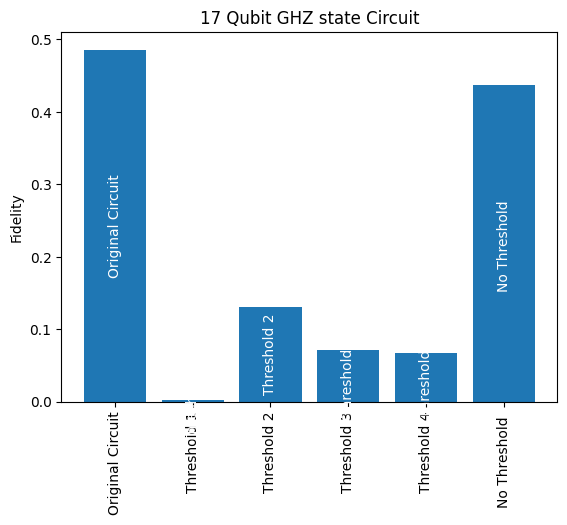

In [20]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Original Circuit', 'Threshold 1', 'Threshold 2', 'Threshold 3', 'Threshold 4', 'No Threshold ']
a=[]
a.append(Fidelity_mean_static_kyiv[0])              # no reuse
a.append(Fidelity_mean_dynamic_1_kyiv[0])           # reuse 1
a.append(Fidelity_mean_dynamic_2_kyiv[0])           # reuse 2
a.append(Fidelity_mean_dynamic_3_kyiv[0])           # reuse 3
a.append(Fidelity_mean_dynamic_4_kyiv[0])           # reuse 4
a.append(Fidelity_mean_dynamic_5_kyiv[0])           # no threshold

values = a
values2=[17,9,6,6,4,3]
#plt.bar(categories, values)

bars = plt.bar(categories, values)

# Adding labels inside the bars
for bar, category in zip(bars, categories):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, category, ha='center', va='center', color='white',rotation=90)

#plt.xlabel('Categories')


# Adding labels to the X-axis
plt.xticks(rotation=90)
#plt.xlabel('Categories')
#plt.xlabel('Variants of 17 Qubit GHZ State Circuit')
plt.ylabel('Fidelity')
plt.title('17 Qubit GHZ state Circuit')

plt.show()

Text(0.5, 1.0, '17 Qubit GHZ state Circuit')

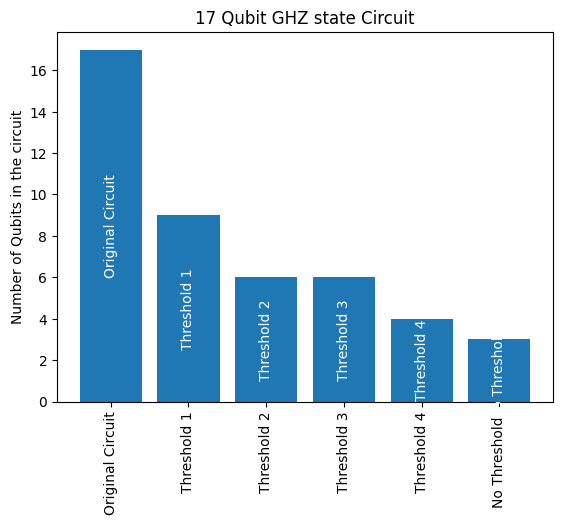

In [21]:
bars = plt.bar(categories, values2)

# Adding labels inside the bars
for bar, category in zip(bars, categories):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, category, ha='center', va='center', color='white',rotation=90)

#plt.xlabel('Categories')


# Adding labels to the X-axis
plt.xticks(rotation=90)
#plt.xlabel('Categories')
#plt.xlabel('Variants of 17 Qubit GHZ State Circuit')
plt.ylabel('Number of Qubits in the circuit')
plt.title('17 Qubit GHZ state Circuit')

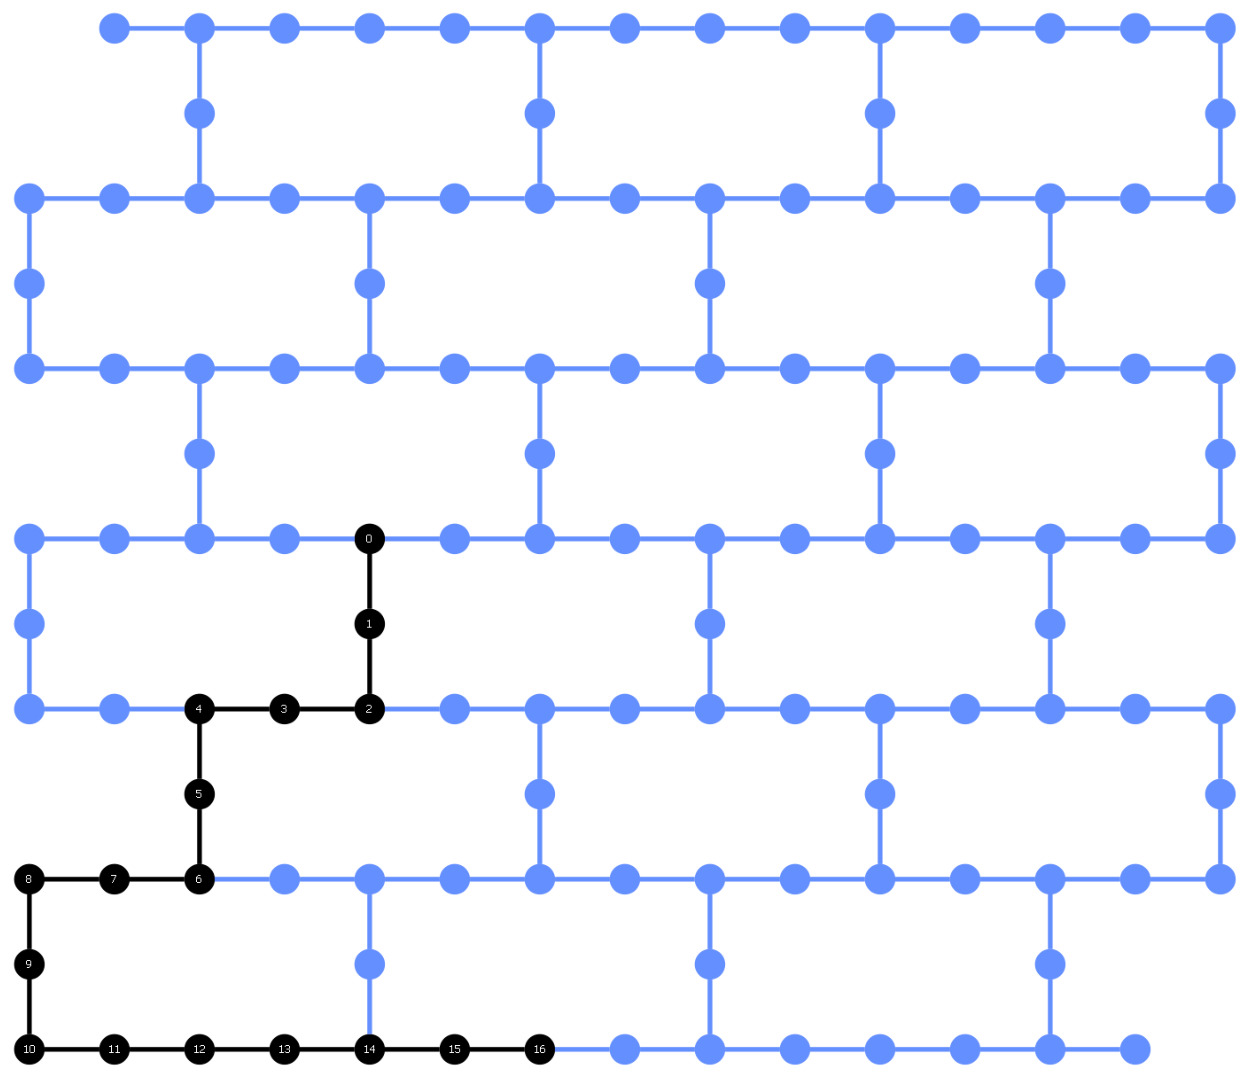

In [14]:
from qiskit.visualization import plot_circuit_layout

plot_circuit_layout(qc_transpiled_list_real[0], backend)

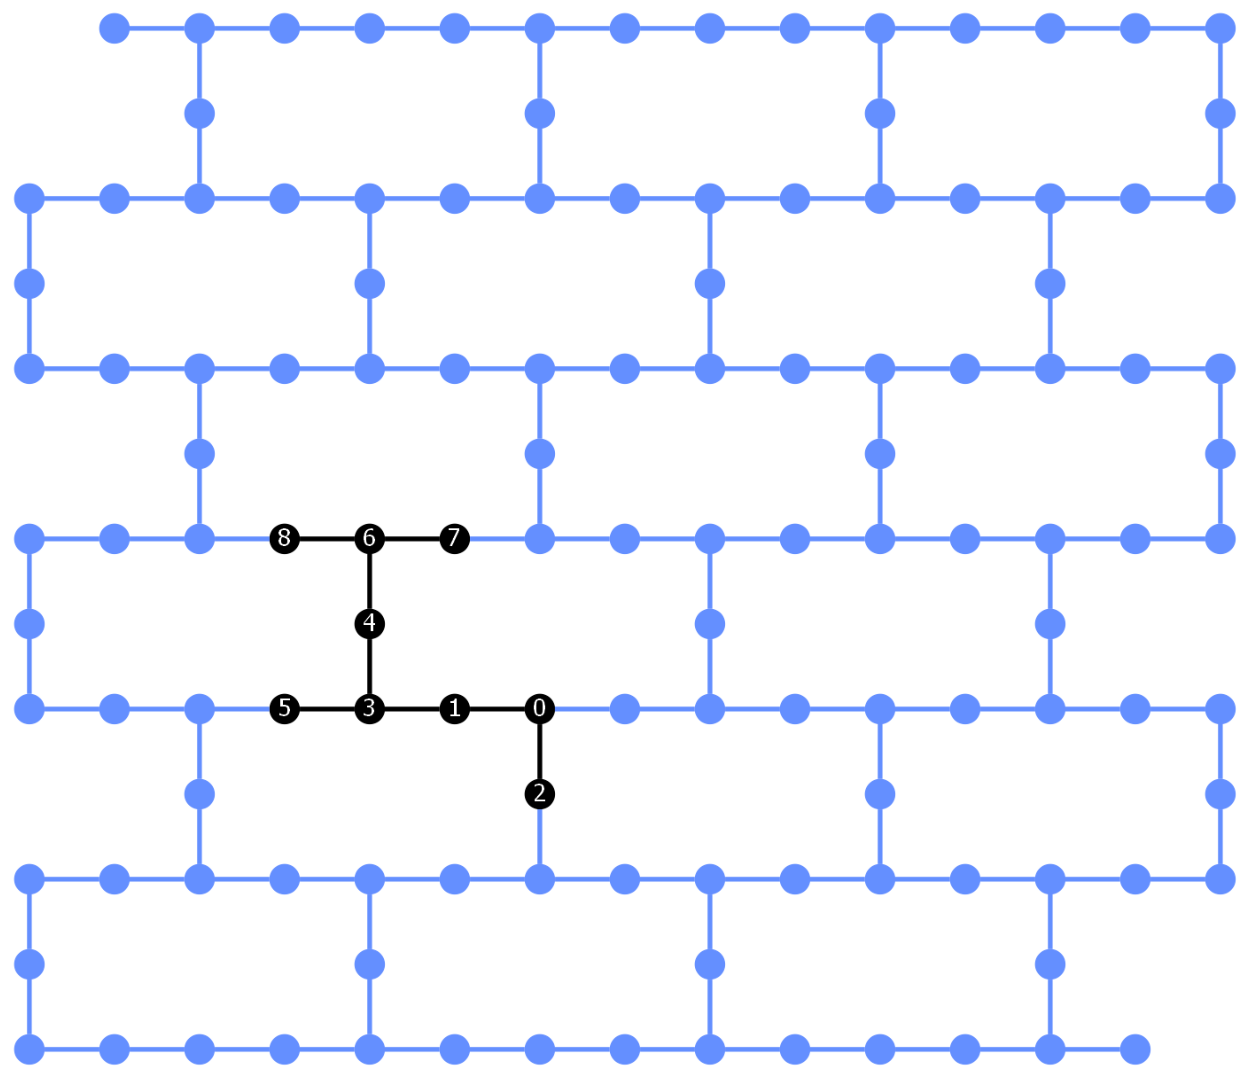

In [15]:
plot_circuit_layout(qc_transpiled_list_real[1], backend)

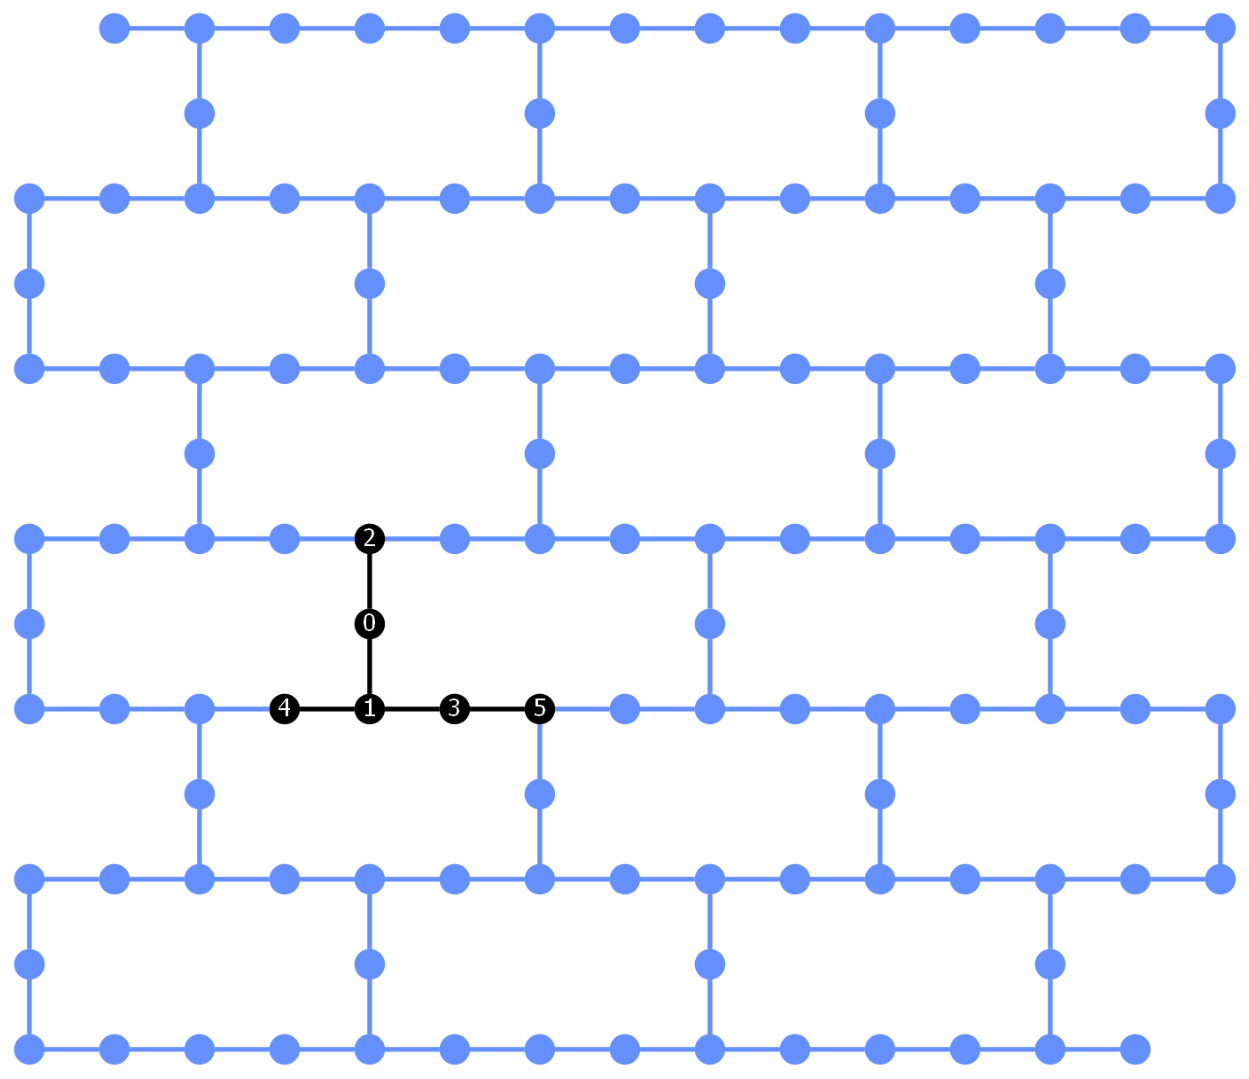

In [16]:
plot_circuit_layout(qc_transpiled_list_real[2], backend)

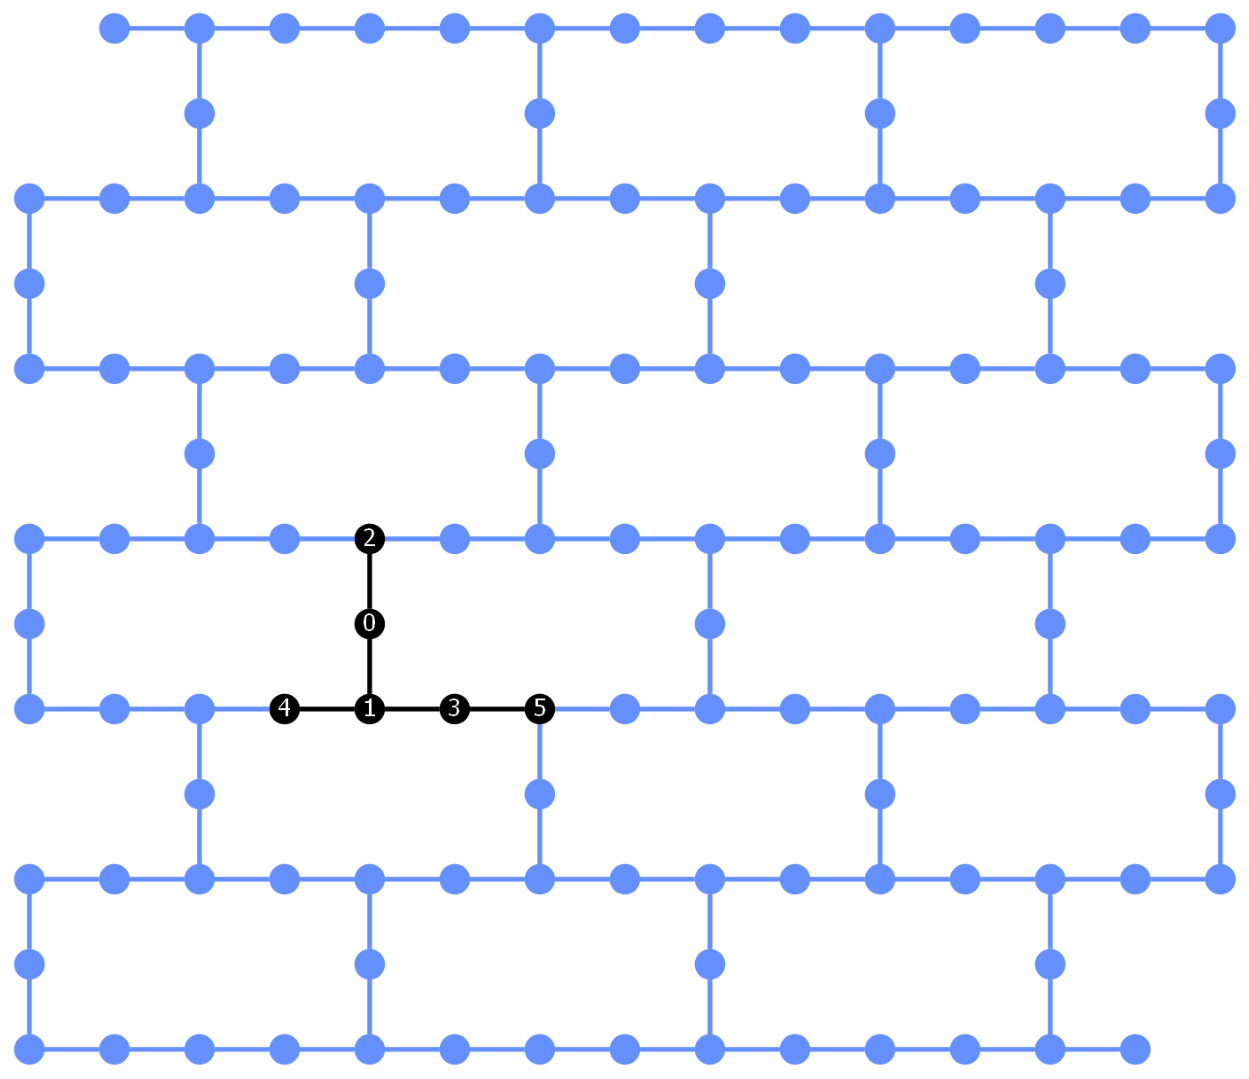

In [17]:
plot_circuit_layout(qc_transpiled_list_real[3], backend)

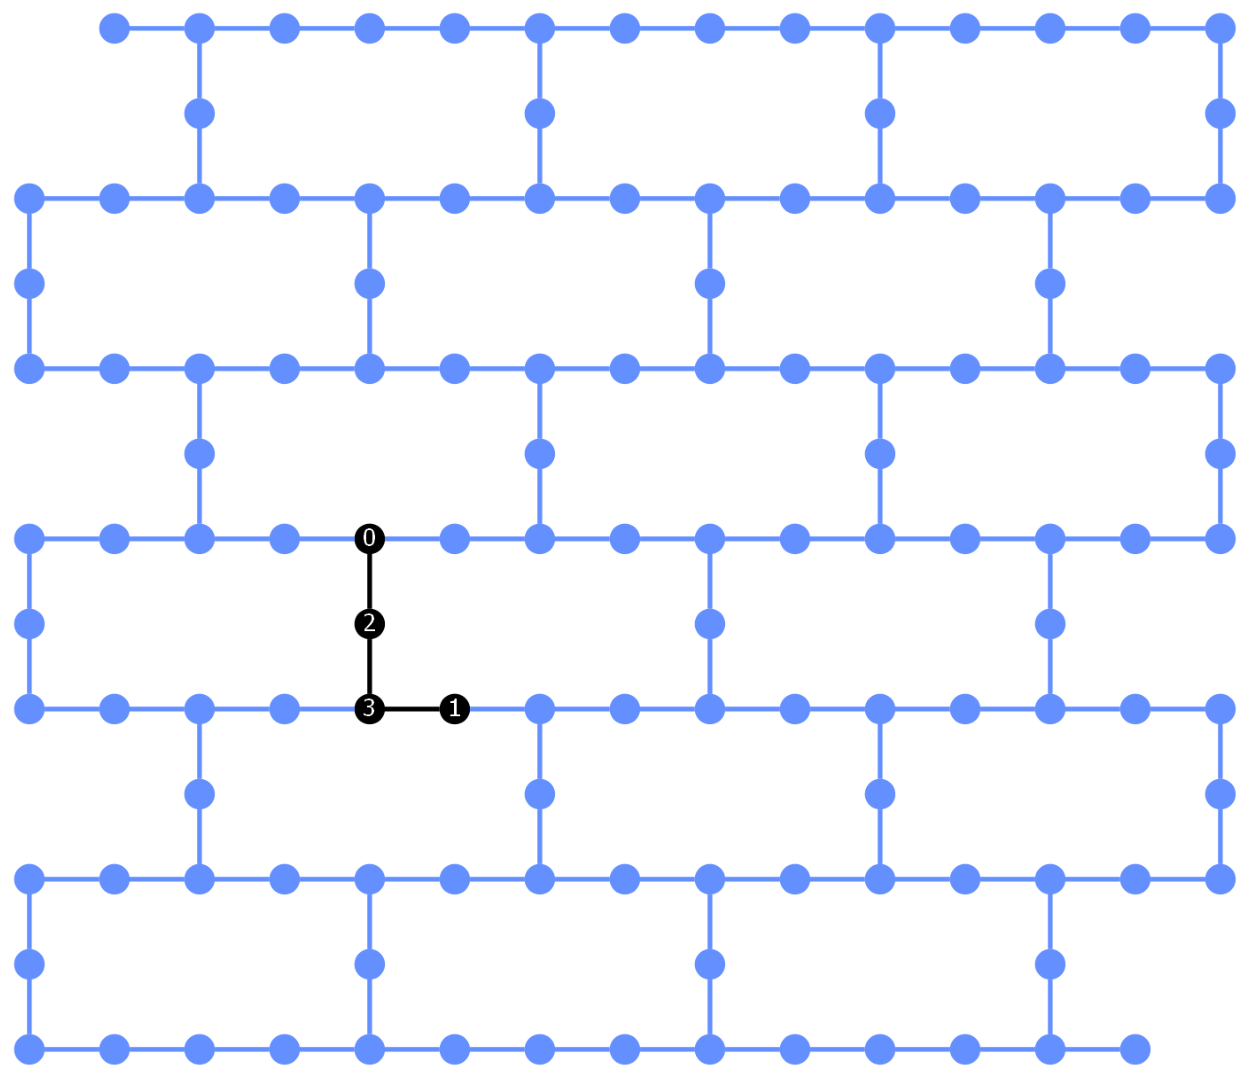

In [18]:
plot_circuit_layout(qc_transpiled_list_real[4], backend)

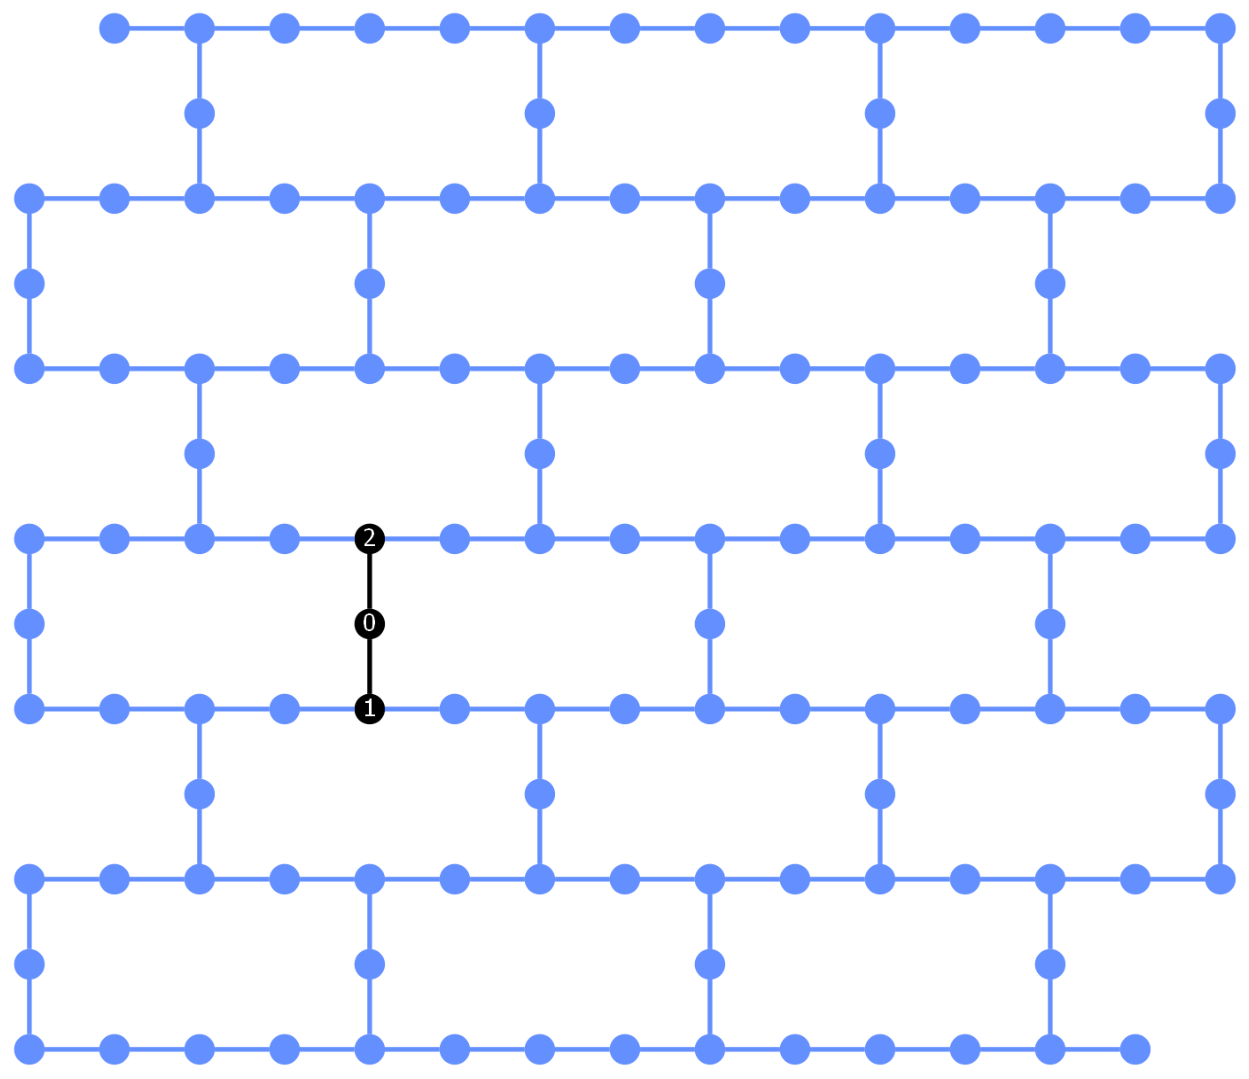

In [19]:
plot_circuit_layout(qc_transpiled_list_real[5], backend)